In [17]:
#importing epidemickabu
#import epidemickabu as ek
import sys
sys.path.append("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/EpidemicKabu")
#from kabuWaves import waves as w
import kabuWaves as ek

# importing other necesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [18]:
#reading the data New
dfNew=pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/data/dataCountryCOVID19K5.csv")
dfNew.head()

,Date,NewCases,NewCasesN,Country
0,2020-01-16,0.0,0.0,Afghanistan
1,2020-01-23,0.0,0.0,Afghanistan
2,2020-01-30,0.0,0.0,Afghanistan
3,2020-02-06,0.0,0.0,Afghanistan
4,2020-02-13,0.0,0.0,Afghanistan


In [19]:
#reading the data Old
dfOld=pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/data/uncoverCountries.csv")
dfOld.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,BE,Belgium,EURO,0,0,0,0
1,2020-01-04,BE,Belgium,EURO,0,0,0,0
2,2020-01-05,BE,Belgium,EURO,0,0,0,0
3,2020-01-06,BE,Belgium,EURO,0,0,0,0
4,2020-01-07,BE,Belgium,EURO,0,0,0,0


In [20]:
#Folder for outputs
outFolderPlot= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examples/plots/"
outFolderDF= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabuLibrary/examplesdataframes/"

In [21]:
#instance of class curve
datesNameN = "Date"
casesNameN = "NewCases"
kernel = 42
plotNameN = "reviewNewColombia"
dfNameN = "reviewNewColombia"
dfNew = dfNew[[datesNameN,casesNameN,"Country"]]
dfNew = dfNew[dfNew["Country"]=="Colombia"].reset_index(drop=True)
exampleNew = ek.waves(dfNew,datesNameN,casesNameN,kernel,kernel,plotNameN,dfNameN,outFolderPlot = "./plots/",outFolderDF="./dataframes/")


In [22]:
#instance of class curve
datesNameO = "Date_reported"
casesNameO = "New_cases"
kernel = 30
plotNameO = "reviewOldColombia"
dfNameO = "reviewOldColombia"
dfOld = dfOld[["Date_reported","Country_code","Country","New_cases"]]
dfOld = dfOld[dfOld["Country_code"]=="CO"].reset_index(drop=True)
exampleOld = ek.waves(dfOld,datesNameO,casesNameO,kernel,kernel,plotNameO,dfNameO,outFolderPlot = "./plots/",outFolderDF="./dataframes/")


In [23]:
exampleNew.stansardizingDates()
exampleNew.df

,Date,NewCases,Country
0,2020-01-16,0.000000,Colombia
1,2020-01-23,0.000000,Colombia
2,2020-01-30,0.000000,Colombia
3,2020-02-06,0.000000,Colombia
4,2020-02-13,0.000000,Colombia
...,...,...,...
247,2024-10-10,1.791998,Colombia
248,2024-10-17,1.250809,Colombia
249,2024-10-24,0.828350,Colombia
250,2024-10-31,0.969170,Colombia


In [24]:
exampleOld.stansardizingDates()
exampleOld.df

,Date_reported,Country_code,Country,New_cases
0,2020-01-03,CO,Colombia,0
1,2020-01-04,CO,Colombia,0
2,2020-01-05,CO,Colombia,0
3,2020-01-06,CO,Colombia,0
4,2020-01-07,CO,Colombia,0
...,...,...,...,...
994,2022-09-23,CO,Colombia,0
995,2022-09-24,CO,Colombia,990
996,2022-09-25,CO,Colombia,0
997,2022-09-26,CO,Colombia,0


In [25]:
exampleNew.curveNormalization(exampleNew.cN,"NormalizedCases")
exampleNew.df

,Date,NewCases,Country,NormalizedCases
0,2020-01-16,0.000000,Colombia,0.000000
1,2020-01-23,0.000000,Colombia,0.000000
2,2020-01-30,0.000000,Colombia,0.000000
3,2020-02-06,0.000000,Colombia,0.000000
4,2020-02-13,0.000000,Colombia,0.000000
...,...,...,...,...
247,2024-10-10,1.791998,Colombia,0.000443
248,2024-10-17,1.250809,Colombia,0.000309
249,2024-10-24,0.828350,Colombia,0.000205
250,2024-10-31,0.969170,Colombia,0.000240


In [26]:
exampleOld.curveNormalization(exampleOld.cN,"NormalizedCases")
exampleOld.df

,Date_reported,Country_code,Country,New_cases,NormalizedCases
0,2020-01-03,CO,Colombia,0,0.000000
1,2020-01-04,CO,Colombia,0,0.000000
2,2020-01-05,CO,Colombia,0,0.000000
3,2020-01-06,CO,Colombia,0,0.000000
4,2020-01-07,CO,Colombia,0,0.000000
...,...,...,...,...,...
994,2022-09-23,CO,Colombia,0,0.000000
995,2022-09-24,CO,Colombia,990,0.027829
996,2022-09-25,CO,Colombia,0,0.000000
997,2022-09-26,CO,Colombia,0,0.000000


In [27]:
exampleNew.curveSmoothing2("NormalizedCases","SmoothedNCases",exampleNew.kernel1)
exampleNew.curveSmoothing2(exampleNew.cN,"SmoothedCases",exampleNew.kernel1)
exampleNew.discreteDerivative("SmoothedNCases","FirstDerivate")
exampleNew.curveSmoothing2("FirstDerivate","FirstDerivateSmoothed",exampleNew.kernel2)
exampleNew.discreteDerivative("FirstDerivateSmoothed","SecondDerivate")
exampleNew.df

,Date,NewCases,Country,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate
0,2020-01-16,0.000000,Colombia,0.000000,0.000000,0.000002,0.006638,NaN,0.000022,NaN
1,2020-01-23,0.000000,Colombia,0.000000,0.000000,0.000004,0.017085,0.000003,0.000032,0.000011
2,2020-01-30,0.000000,Colombia,0.000000,0.000000,0.000010,0.042418,0.000006,0.000049,0.000017
3,2020-02-06,0.000000,Colombia,0.000000,0.000000,0.000025,0.100707,0.000014,0.000075,0.000025
4,2020-02-13,0.000000,Colombia,0.000000,0.000000,0.000056,0.226688,0.000031,0.000113,0.000038
...,...,...,...,...,...,...,...,...,...,...
247,2024-10-10,1.791998,Colombia,0.000443,0.096507,0.000553,2.236452,-0.000135,-0.000175,0.000033
248,2024-10-17,1.250809,Colombia,0.000309,0.142380,0.000457,1.847540,-0.000096,-0.000146,0.000030
249,2024-10-24,0.828350,Colombia,0.000205,0.187969,0.000389,1.575122,-0.000067,-0.000120,0.000025
250,2024-10-31,0.969170,Colombia,0.000240,0.222059,0.000343,1.386503,-0.000047,-0.000100,0.000020


In [28]:
exampleOld.curveSmoothing2("NormalizedCases","SmoothedNCases",exampleOld.kernel1)
exampleOld.curveSmoothing2(exampleOld.cN,"SmoothedCases",exampleOld.kernel1)
exampleOld.discreteDerivative("SmoothedNCases","FirstDerivate")
exampleOld.curveSmoothing2("FirstDerivate","FirstDerivateSmoothed",exampleOld.kernel2)
exampleOld.discreteDerivative("FirstDerivateSmoothed","SecondDerivate")
exampleOld.df

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate
0,2020-01-03,CO,Colombia,0,0.000000,0.000000,1.295083e-09,0.000046,NaN,1.106584e-07,NaN
1,2020-01-04,CO,Colombia,0,0.000000,0.000000,1.706214e-09,0.000061,4.111314e-10,1.244132e-07,1.375482e-08
2,2020-01-05,CO,Colombia,0,0.000000,0.000000,2.245251e-09,0.000080,5.390370e-10,1.399836e-07,1.557045e-08
3,2020-01-06,CO,Colombia,0,0.000000,0.000000,2.950966e-09,0.000105,7.057151e-10,1.576112e-07,1.762753e-08
4,2020-01-07,CO,Colombia,0,0.000000,0.000000,3.873496e-09,0.000138,9.225297e-10,1.775680e-07,1.995686e-08
...,...,...,...,...,...,...,...,...,...,...,...
994,2022-09-23,CO,Colombia,0,0.000000,0.050004,7.951777e-03,282.884478,-2.754476e-04,-5.215982e-04,1.303939e-05
995,2022-09-24,CO,Colombia,990,0.027829,0.050788,7.693489e-03,273.695876,-2.582882e-04,-5.091602e-04,1.243804e-05
996,2022-09-25,CO,Colombia,0,0.000000,0.051356,7.451455e-03,265.085511,-2.420342e-04,-4.973019e-04,1.185833e-05
997,2022-09-26,CO,Colombia,0,0.000000,0.051699,7.224789e-03,257.021877,-2.266657e-04,-4.860011e-04,1.130073e-05


In [29]:
def plotting (example,datesName):
     plt.plot(example.df[datesName],example.df["SmoothedNCases"],color= "red")
     plt.plot(example.df[datesName],example.df["FirstDerivateSmoothed"]/example.df["FirstDerivateSmoothed"].max(),color= "blue", linewidth = '0.7')
     plt.plot(example.df[datesName],example.df["SecondDerivate"]/example.df["SecondDerivate"].max(),color= "black" ,linewidth = '1')
     plt.axhline(y=0,  color='gray')
     #for date in example.cutDatesW:
     #     plt.axvline(x=date, color='black', linestyle='--', linewidth=.91)
     plt.show()
    
     #plt.plot(example.df[datesName],example.df["NormalizedCases"],color= "gray", linewidth = '0.7')
     #plt.plot(example.df[datesName],example.df["SmoothedNCases"],color= "red" ,linewidth = '1')
     #for date in example.cutDatesW:
     #    plt.axvline(x=date, color='black', linestyle='--', linewidth=.91)

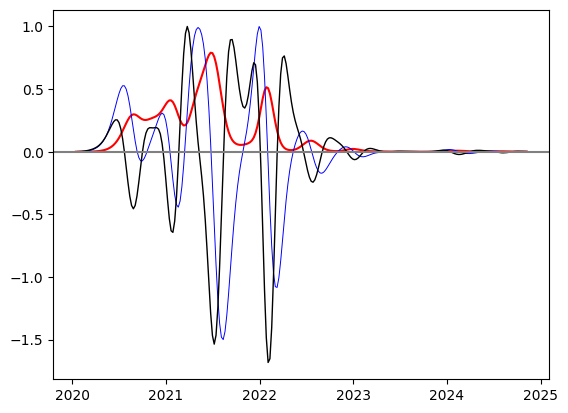

In [30]:
plotting (exampleNew,datesNameN)

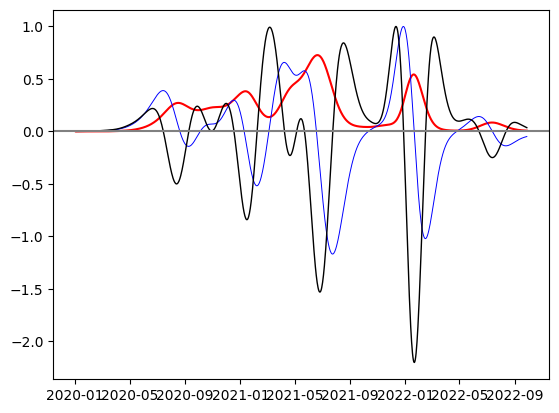

In [31]:
plotting (exampleOld,datesNameO)

In [32]:
exampleNew.idenCutPointsW("FirstDerivateSmoothed","rollingFDS")
exampleNew.idenPreviousDatesW("rollingFDS","FirstDerivateSmoothed")
exampleNew.df

        Date  FirstDerivateSmoothed      Date1  FirstDerivateSmoothed1
0 2020-10-22           7.613700e-04 2020-10-15           -1.007411e-03
1 2021-03-18           4.285777e-03 2021-03-11           -4.934963e-03
2 2021-10-28           5.853724e-05 2021-10-21           -3.465335e-03
3 2022-05-12           4.664679e-05 2022-05-05           -3.019210e-03
4 2022-11-03           1.468020e-04 2022-10-27           -5.892825e-04
5 2023-09-21           2.983692e-07 2023-09-14           -1.746150e-07
6 2024-05-23           1.666237e-05 2024-05-16           -6.801347e-05


,Date,NewCases,Country,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingFDS,cutDatesW
0,2020-01-16,0.000000,Colombia,0.000000,0.000000,0.000002,0.006638,NaN,0.000022,NaN,False,0
1,2020-01-23,0.000000,Colombia,0.000000,0.000000,0.000004,0.017085,0.000003,0.000032,0.000011,0.0,0
2,2020-01-30,0.000000,Colombia,0.000000,0.000000,0.000010,0.042418,0.000006,0.000049,0.000017,0.0,0
3,2020-02-06,0.000000,Colombia,0.000000,0.000000,0.000025,0.100707,0.000014,0.000075,0.000025,0.0,0
4,2020-02-13,0.000000,Colombia,0.000000,0.000000,0.000056,0.226688,0.000031,0.000113,0.000038,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2024-10-10,1.791998,Colombia,0.000443,0.096507,0.000553,2.236452,-0.000135,-0.000175,0.000033,0.0,0
248,2024-10-17,1.250809,Colombia,0.000309,0.142380,0.000457,1.847540,-0.000096,-0.000146,0.000030,0.0,0
249,2024-10-24,0.828350,Colombia,0.000205,0.187969,0.000389,1.575122,-0.000067,-0.000120,0.000025,0.0,0
250,2024-10-31,0.969170,Colombia,0.000240,0.222059,0.000343,1.386503,-0.000047,-0.000100,0.000020,0.0,0


In [33]:
exampleNew.df.rollingFDS.value_counts()

False    245
1.0        7
Name: rollingFDS, dtype: int64

In [34]:
exampleNew.df.cutDatesW.value_counts()

0    245
1      7
Name: cutDatesW, dtype: int64

In [35]:
exampleOld.idenCutPointsW("FirstDerivateSmoothed","rollingFDS")
exampleOld.idenPreviousDatesW("rollingFDS","FirstDerivateSmoothed")
exampleOld.df

  Date_reported  FirstDerivateSmoothed Date_reported1  FirstDerivateSmoothed1
0    2020-10-05               0.000056     2020-10-04               -0.000006
1    2021-03-06               0.000268     2021-03-05               -0.000032
2    2021-10-12               0.000025     2021-10-11               -0.000008
3    2022-04-25               0.000004     2022-04-24               -0.000026


,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingFDS,cutDatesW
0,2020-01-03,CO,Colombia,0,0.000000,0.000000,1.295083e-09,0.000046,NaN,1.106584e-07,NaN,False,0
1,2020-01-04,CO,Colombia,0,0.000000,0.000000,1.706214e-09,0.000061,4.111314e-10,1.244132e-07,1.375482e-08,0.0,0
2,2020-01-05,CO,Colombia,0,0.000000,0.000000,2.245251e-09,0.000080,5.390370e-10,1.399836e-07,1.557045e-08,0.0,0
3,2020-01-06,CO,Colombia,0,0.000000,0.000000,2.950966e-09,0.000105,7.057151e-10,1.576112e-07,1.762753e-08,0.0,0
4,2020-01-07,CO,Colombia,0,0.000000,0.000000,3.873496e-09,0.000138,9.225297e-10,1.775680e-07,1.995686e-08,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2022-09-23,CO,Colombia,0,0.000000,0.050004,7.951777e-03,282.884478,-2.754476e-04,-5.215982e-04,1.303939e-05,0.0,0
995,2022-09-24,CO,Colombia,990,0.027829,0.050788,7.693489e-03,273.695876,-2.582882e-04,-5.091602e-04,1.243804e-05,0.0,0
996,2022-09-25,CO,Colombia,0,0.000000,0.051356,7.451455e-03,265.085511,-2.420342e-04,-4.973019e-04,1.185833e-05,0.0,0
997,2022-09-26,CO,Colombia,0,0.000000,0.051699,7.224789e-03,257.021877,-2.266657e-04,-4.860011e-04,1.130073e-05,0.0,0


In [36]:
exampleOld.df.rollingFDS.value_counts()

False    995
1.0        4
Name: rollingFDS, dtype: int64

In [37]:
exampleOld.df.cutDatesW.value_counts()

0    995
1      4
Name: cutDatesW, dtype: int64

In [53]:
#reviewing in detail: idenPreviousDatesW
df = exampleNew.df
self1 = exampleNew
inputCuts = "rollingFDS"
inputToFindCuts = "FirstDerivateSmoothed"
positions1 = df[df[inputCuts]==True][[self1.dN,inputToFindCuts]]#.reset_index(drop=True)
positions1
        

,Date,FirstDerivateSmoothed
40,2020-10-22,7.613700e-04
61,2021-03-18,4.285777e-03
93,2021-10-28,5.853724e-05
121,2022-05-12,4.664679e-05
146,2022-11-03,1.468020e-04
192,2023-09-21,2.983692e-07
227,2024-05-23,1.666237e-05


In [39]:
print(df[self1.dN])
print(positions1[self1.dN])
print(datetime.timedelta(days=1))
list(positions1[self1.dN] - datetime.timedelta(days=1))

0     2020-01-16
1     2020-01-23
2     2020-01-30
3     2020-02-06
4     2020-02-13
         ...    
247   2024-10-10
248   2024-10-17
249   2024-10-24
250   2024-10-31
251   2024-11-07
Name: Date, Length: 252, dtype: datetime64[ns]
40    2020-10-22
61    2021-03-18
93    2021-10-28
121   2022-05-12
146   2022-11-03
192   2023-09-21
227   2024-05-23
Name: Date, dtype: datetime64[ns]
1 day, 0:00:00


[Timestamp('2020-10-21 00:00:00'),
 Timestamp('2021-03-17 00:00:00'),
 Timestamp('2021-10-27 00:00:00'),
 Timestamp('2022-05-11 00:00:00'),
 Timestamp('2022-11-02 00:00:00'),
 Timestamp('2023-09-20 00:00:00'),
 Timestamp('2024-05-22 00:00:00')]

In [40]:
df[df[self1.dN].isin(list(positions1[self1.dN] - datetime.timedelta(days=1)))]#[[self1.dN,inputToFindCuts]].reset_index(drop=True)

,Date,NewCases,Country,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingFDS,cutDatesW


In [54]:
#gets the dates and the values in inputToFindCuts which are True in inputCuts (positive values)
positions2 = df[df[self1.dN].isin(list(positions1[self1.dN] - datetime.timedelta(days=1)))][[self1.dN,inputToFindCuts]].reset_index(drop=True)    
#gets the previous dates of dates in position1 (which are the dates of the negative values). Then, it gets their dates and the values in inputToFindCuts 
positions2.rename(columns={self1.dN:self1.dN+"1",inputToFindCuts:inputToFindCuts+"1"},inplace=True)
positions = pd.concat([positions1, positions2], axis=1)
print(positions2)
positions

Empty DataFrame
Columns: [Date1, FirstDerivateSmoothed1]
Index: []


,Date,FirstDerivateSmoothed,Date1,FirstDerivateSmoothed1
40,2020-10-22,7.613700e-04,NaT,NaN
61,2021-03-18,4.285777e-03,NaT,NaN
93,2021-10-28,5.853724e-05,NaT,NaN
121,2022-05-12,4.664679e-05,NaT,NaN
146,2022-11-03,1.468020e-04,NaT,NaN
192,2023-09-21,2.983692e-07,NaT,NaN
227,2024-05-23,1.666237e-05,NaT,NaN


Solution:
1. reset index of df in the first moment in the library to avoid future issues (not sure about the necessity of this so I did not put it in the final version)
2. positions2 will be get from the indices of positions1 avoiding to reset the indices of this sub-dataframe
3. follow the same steps as previously
MAÑANA AÑADIR ESTOS CAMBIOS A LA LIBREARIA VOLVERLA A CARGAR Y GENERAR LOS ANALISIS DE LOS KERNELS QUE ESTABA HACIENDO

In [55]:
indices = positions1.index-1
valid_indices = indices[indices>=0] 
valid_indices

Int64Index([39, 60, 92, 120, 145, 191, 226], dtype='int64')

In [56]:
positions2 = df.iloc[valid_indices][[self1.dN,inputToFindCuts]].reset_index(drop=True)   
positions2

,Date,FirstDerivateSmoothed
0,2020-10-15,-1.007411e-03
1,2021-03-11,-4.934963e-03
2,2021-10-21,-3.465335e-03
3,2022-05-05,-3.019210e-03
4,2022-10-27,-5.892825e-04
5,2023-09-14,-1.746150e-07
6,2024-05-16,-6.801347e-05


In [57]:
positions2.rename(columns={self1.dN:self1.dN+"1",inputToFindCuts:inputToFindCuts+"1"},inplace=True)
positions = pd.concat([positions1.reset_index(drop=True), positions2], axis=1)
positions

,Date,FirstDerivateSmoothed,Date1,FirstDerivateSmoothed1
0,2020-10-22,7.613700e-04,2020-10-15,-1.007411e-03
1,2021-03-18,4.285777e-03,2021-03-11,-4.934963e-03
2,2021-10-28,5.853724e-05,2021-10-21,-3.465335e-03
3,2022-05-12,4.664679e-05,2022-05-05,-3.019210e-03
4,2022-11-03,1.468020e-04,2022-10-27,-5.892825e-04
5,2023-09-21,2.983692e-07,2023-09-14,-1.746150e-07
6,2024-05-23,1.666237e-05,2024-05-16,-6.801347e-05


In [58]:
self1.cutDatesW = list(positions.agg(lambda x : x[self1.dN] if abs(x[inputToFindCuts])<abs(x[inputToFindCuts+"1"])  else x[self1.dN+"1"], axis=1))
#selects the dates associated to the value of inputToFindCuts (in positions) closest to zero
self1.df["cutDatesW"] = self1.df[self1.dN].isin(self1.cutDatesW).astype(int)
#creates a new column with 1 in the dates selected
self1.df["cutDatesW"].value_counts()
        

0    245
1      7
Name: cutDatesW, dtype: int64

In [59]:
exampleNew.df

,Date,NewCases,Country,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingFDS,cutDatesW
0,2020-01-16,0.000000,Colombia,0.000000,0.000000,0.000002,0.006638,NaN,0.000022,NaN,False,0
1,2020-01-23,0.000000,Colombia,0.000000,0.000000,0.000004,0.017085,0.000003,0.000032,0.000011,0.0,0
2,2020-01-30,0.000000,Colombia,0.000000,0.000000,0.000010,0.042418,0.000006,0.000049,0.000017,0.0,0
3,2020-02-06,0.000000,Colombia,0.000000,0.000000,0.000025,0.100707,0.000014,0.000075,0.000025,0.0,0
4,2020-02-13,0.000000,Colombia,0.000000,0.000000,0.000056,0.226688,0.000031,0.000113,0.000038,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2024-10-10,1.791998,Colombia,0.000443,0.096507,0.000553,2.236452,-0.000135,-0.000175,0.000033,0.0,0
248,2024-10-17,1.250809,Colombia,0.000309,0.142380,0.000457,1.847540,-0.000096,-0.000146,0.000030,0.0,0
249,2024-10-24,0.828350,Colombia,0.000205,0.187969,0.000389,1.575122,-0.000067,-0.000120,0.000025,0.0,0
250,2024-10-31,0.969170,Colombia,0.000240,0.222059,0.000343,1.386503,-0.000047,-0.000100,0.000020,0.0,0


In [60]:
self1.df["cutDatesW"].value_counts()

0    245
1      7
Name: cutDatesW, dtype: int64

In [62]:
exampleNew.thresholdPos()

In [63]:
exampleNew.df = exampleNew.df[[exampleNew.dN,exampleNew.cN,"SmoothedCases","cutDatesW"]]
exampleNew.df

,Date,NewCases,SmoothedCases,cutDatesW
0,2020-01-16,0.000000,0.006638,0
1,2020-01-23,0.000000,0.017085,0
2,2020-01-30,0.000000,0.042418,0
3,2020-02-06,0.000000,0.100707,0
4,2020-02-13,0.000000,0.226688,0
...,...,...,...,...
247,2024-10-10,1.791998,2.236452,0
248,2024-10-17,1.250809,1.847540,0
249,2024-10-24,0.828350,1.575122,0
250,2024-10-31,0.969170,1.386503,0


In [65]:
exampleNew.plottingTheCurveNormalized(exampleNew.cutDatesW)

KeyError: 'NormalizedCases'

<Figure size 1200x600 with 0 Axes>

In [61]:
exampleNew.plottingTheCurveNoNormalized(exampleNew.cutDatesW)

OSError: Cannot save file into a non-existent directory: 'dataframes'

In [46]:
#reviewing in detail: idenPreviousDatesW
df = exampleOld.df
self1 = exampleOld
inputCuts = "rollingFDS"
inputToFindCuts = "FirstDerivateSmoothed"
positions1 = df[df[inputCuts]==True][[self1.dN,inputToFindCuts]].reset_index(drop=True)
positions1

,Date_reported,FirstDerivateSmoothed
0,2020-10-05,0.000056
1,2021-03-06,0.000268
2,2021-10-12,0.000025
3,2022-04-25,0.000004


In [51]:
#gets the dates and the values in inputToFindCuts which are True in inputCuts (positive values)
positions2 = df[df[self1.dN].isin(list(positions1[self1.dN] - datetime.timedelta(days=1)))][[self1.dN,inputToFindCuts]].reset_index(drop=True)    
#gets the previous dates of dates in position1 (which are the dates of the negative values). Then, it gets their dates and the values in inputToFindCuts 
positions2.rename(columns={self1.dN:self1.dN+"1",inputToFindCuts:inputToFindCuts+"1"},inplace=True)
positions = pd.concat([positions1, positions2], axis=1)
positions

,Date_reported,FirstDerivateSmoothed,Date_reported1,FirstDerivateSmoothed1
0,2020-10-05,0.000056,2020-10-04,-0.000006
1,2021-03-06,0.000268,2021-03-05,-0.000032
2,2021-10-12,0.000025,2021-10-11,-0.000008
3,2022-04-25,0.000004,2022-04-24,-0.000026


In [52]:
self1.cutDatesW = list(positions.agg(lambda x : x[self1.dN] if abs(x[inputToFindCuts])<abs(x[inputToFindCuts+"1"])  else x[self1.dN+"1"], axis=1))
#selects the dates associated to the value of inputToFindCuts (in positions) closest to zero
self1.df["cutDatesW"] = self1.df[self1.dN].isin(self1.cutDatesW).astype(int)
#creates a new column with 1 in the dates selected
self1.df["cutDatesW"].value_counts()

0    995
1      4
Name: cutDatesW, dtype: int64